In [23]:
import numpy as np
import pandas as pd
df = pd.read_csv('npadata.csv')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
pd.options.display.max_rows = 999
#df1 = just country, requirements, duration
df1 = df[['country', 'requirements', 'degree', 'duration']]

In [29]:
pd.options.display.max_rows = 999

# First, let's have a look at the data
Here we have it sorted by country

In [30]:
df.sort_values('country')

,Source,Order,country,requirements,duration,degree,curriculum_physicians,trainee-supervisor,npagrads,npaprograms,...,"Maintaining general anaesthesia with volatiles (ether, halothane, isoflurane, etc)",Maintaining anaesthesia with ketamine,Insertion of arterial cannulas,"Insertion of central venous access (internal jugular, femoral, subclavian)",Video laryngoscopy,Fiberoptic intubation,Managing mechanical ventilation,Teaching anaesthesia trainees in theatre,Triage of critically ill patients,Communicating directly with patients' families
94,redcap2018,127,Angola,Medical school,48.0,physician specialist,NaN,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,redcap2018,113,Angola,Medical school,NaN,physician specialist,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,redcap2018,106,Angola,Nursing diploma,36.0,Diploma,1-50%,2.000000,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,redcap2018,111,Benin,Medical school,NaN,physician specialist,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,SSA,1,Benin,Nursing diploma,36.0,Master's degree,>50%,NaN,20.0,1.0,...,"Yes, trained to perform independently","Yes, trained to perform independently",Not trained to perform,Not trained to perform,Not trained to perform,Not trained to perform,"Yes, trained to perform independently",Trained to perform under direct supervision,NaN,"Yes, trained to perform independently"
87,redcap2018,86,Benin,Nursing diploma,24.0,Master's degree,>50%,2.000000,15.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,redcap2018,87,Benin,Nursing diploma,24.0,Master's degree,>50%,2.000000,15.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,AAAC,79,Benin,Diploma,72.0,Diploma,>50%,5.000000,25.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,redcap2018,112,Benin,Medical school,NaN,physician specialist,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,SSA,2,Botswana,Nursing degree,12.0,Diploma,>50%,NaN,8.0,1.0,...,"Yes, trained to perform independently","Yes, trained to perform independently",Not trained to perform,Not trained to perform,I am not sure,I am not sure,"Yes, trained to perform independently",I am not sure,NaN,I am not sure


It appears there are 127 possible separate programs

# How many have blanks in the core categories of requirements, duration, or degree?

These are the entries with something missing:

In [31]:
missing = df1[(df.duration.isnull()==True) | (df['requirements'].isnull()==True) | (df['degree'].isnull()==True)].sort_values('country')
missing

,country,requirements,degree,duration
93,Angola,Medical school,physician specialist,NaN
95,Benin,Medical school,physician specialist,NaN
96,Benin,Medical school,physician specialist,NaN
80,Burundi,NaN,Licence,NaN
110,Chad,NaN,NaN,NaN
8,Ethiopia,NaN,Bachelor's degree,NaN
9,Ethiopia,NaN,Bachelor's degree,NaN
102,Ethiopia,Medical school,physician specialist,NaN
10,Gambia,Nursing diploma,Bachelor's degree,NaN
111,Ghana,NaN,NaN,NaN


In [32]:
missingnum = missing['country'].count()
print('There are ', missingnum, 'rows with missing core elements')

There are  28 rows with missing core elements


# Therefore, there are 28 entries with missing elements
### Let's drop them from the database, the new database is df2

In [33]:
df2 = df1[(df.duration.isnull()==False) & (df.requirements.isnull()==False) & (df.degree.isnull()==False)].sort_values('country')
print('There are', df2.country.nunique(), 'unique countries in the dataset')

There are 34 unique countries in the dataset


### There are 34 countries represented in the final dataset:

In [34]:
df2.country.value_counts()

Uganda                      9
Ethiopia                    7
Nigeria                     5
Burkina Faso                5
Tanzania                    5
Benin                       4
DRC                         4
Somaliland                  4
Niger                       4
Sierra Leone                4
Kenya                       4
Malawi                      4
Zimbabwe                    3
Ghana                       3
Gabon                       3
Cote D'Ivoire               3
Rwanda                      3
Mozambique                  2
Angola                      2
Burundi                     2
Senegal                     2
Liberia                     2
Cameroon                    2
Zambia                      2
Togo                        2
Botswana                    1
Sudan                       1
Swaziland                   1
South Africa                1
Congo (Brazzaville)         1
South Sudan                 1
Madagascar                  1
Central African Republic    1
Eritrea   

# <u> Unique programs</u>
### Any degree that has two different durations means we have a duplicate response, and we'll need to sort out which one we trust.
For example, in Benin, the data suggests that you can enter with a nursing diploma, and get a master's degree, with two different program durations.

In [35]:
df2.groupby(['country', 'requirements','degree','duration']).count()

Empty DataFrame
Columns: []
Index: [(Angola, Medical school, physician specialist, 48.0), (Angola, Nursing diploma, Diploma, 36.0), (Benin, Diploma, Diploma, 72.0), (Benin, Nursing diploma, Master's degree, 24.0), (Benin, Nursing diploma, Master's degree, 36.0), (Botswana, Nursing degree, Diploma, 12.0), (Burkina Faso, Medical school, physician specialist, 48.0), (Burkina Faso, Nursing degree, Diploma, 24.0), (Burkina Faso, Nursing diploma, Diploma, 24.0), (Burundi, Nursing diploma, Diploma, 36.0), (Burundi, Secondary school, Bachelor's degree, 48.0), (Cameroon, Nursing degree, Diploma, 24.0), (Cameroon, Nursing diploma, Diploma, 24.0), (Central African Republic, Nursing diploma, Master's degree, 24.0), (Congo (Brazzaville), Nursing diploma, Assistant sanitaire en anesthésie-réanimation, 24.0), (Cote D'Ivoire, Medical school, physician specialist, 48.0), (Cote D'Ivoire, Nursing diploma, Diploma, 24.0), (Cote D'Ivoire, Nursing diploma, Diploma, 36.0), (DRC, Medical school, physician specialist, 60.0), (DRC, Nursing diploma, Diploma, 36.0), (DRC, Other, Autre, 9.0), (Eritrea, Nursing diploma, Diploma, 36.0), (Ethiopia, Bachelor's degree, Master's degree, 24.0), (Ethiopia, Medical school, physician specialist, 36.0), (Ethiopia, Nursing diploma, Bachelor's degree, 48.0), (Ethiopia, Nursing diploma, Certificate, 12.0), (Ethiopia, Secondary school, Bachelor's degree, 48.0), (Gabon, Medical school, physician specialist, 48.0), (Gabon, Nursing degree, Certificate, 36.0), (Gabon, Nursing diploma, Master's degree, 36.0), (Ghana, Advanced diploma anesthesia, Bachelor's degree, 24.0), (Ghana, Nursing degree, Bachelor's degree, 24.0), (Ghana, Nursing diploma, Diploma, 24.0), (Kenya, Diploma in clinical medicine, Diploma, 18.0), (Kenya, Nursing degree, I don't know, 24.0), (Kenya, Nursing diploma, Diploma, 18.0), (Liberia, Nursing diploma, Diploma, 24.0), (Liberia, Other, Diploma, 24.0), (Madagascar, Secondary school, Bachelor's degree, 36.0), (Malawi, Medical school, physician specialist, 48.0), (Malawi, Nursing diploma, Diploma, 18.0), (Malawi, Other, Diploma, 36.0), (Mozambique, Medical school, physician specialist, 48.0), (Mozambique, Nursing diploma, Bachelor's degree, 24.0), (Niger, Nursing diploma, Licence, 36.0), (Nigeria, Nursing degree, Certificate, 18.0), (Nigeria, Nursing degree, Diploma, 18.0), (Nigeria, Nursing diploma, Certificate, 24.0), (Nigeria, Nursing diploma, Diploma, 18.0), (Rwanda, Medical school, physician specialist, 48.0), (Rwanda, Nursing diploma, Bachelor's degree, 48.0), (Rwanda, Secondary school, Bachelor's degree, 48.0), (Senegal, Medical school, physician specialist, 48.0), (Senegal, Nursing diploma, Diploma, 24.0), (Sierra Leone, Diploma, Diploma, 18.0), (Sierra Leone, Nursing degree, Diploma, 18.0), (Sierra Leone, Nursing diploma, Diploma, 18.0), (Sierra Leone, nursing certificate, State enrolled community health nurse SECHN,, Certificate, 12.0), (Somaliland, Nursing degree, Bachelor's degree, 18.0), (Somaliland, Nursing degree, Bachelor's degree, 24.0), (Somaliland, Nursing diploma, Bachelor's degree, 2.0), (Somaliland, Previously qualified nurse, midwife or pharmacist, Nurse anesthetist', 18.0), (South Africa, Medical school, Diploma, 6.0), (South Sudan, Nursing diploma, Diploma, 24.0), (Sudan, Secondary school, Bachelor's degree, 48.0), (Swaziland, Nursing degree, Bachelor's degree, 24.0), (Tanzania, Assisstant medical officer (general), Diploma, 24.0), (Tanzania, Nursing degree, Certificate, 12.0), (Tanzania, Nursing diploma, Certificate, 12.0), (Tanzania, Nursing diploma, Diploma, 24.0), (Togo, Nursing diploma, Master's degree, 24.0), (Togo, Secondary school, I don't know, 36.0), (Uganda, Medical school, physician specialist, 36.0), (Uganda, Nursing diploma, Certificate, 18.0), (Uganda, Nursing diploma, Diploma, 2.5), (Uganda, Nursing diploma, Diploma, 24.0), (Uganda, Nursing diploma, Diploma, 36.0), (Uganda, Other, Diploma, 24.0), (Uganda, diploma in nursing, midwifery or clinical medicine, Advanced D

## Here's the same thing again, but easier to identify:
### In the 'duration' column, anything >1 means we have to sort out which program we believe to exist.
It is unlikely that two programs have the same entry requirements, and give the same degree, but have two <i>different</i> durations, right?

In [36]:
df2.groupby(['country', 'requirements','degree']).nunique()

country  \
country                  requirements                                       degree                                                   
Angola                   Medical school                                     physician specialist                                 1   
                         Nursing diploma                                    Diploma                                              1   
Benin                    Diploma                                            Diploma                                              1   
                         Nursing diploma                                    Master's degree                                      1   
Botswana                 Nursing degree                                     Diploma                                              1   
Burkina Faso             Medical school                                     physician specialist                                 1   
                         Nursing degree                                     Diploma                                              1   
                         Nursing diploma                                    Diploma                                              1   
Burundi                  Nursing diploma                                    Diploma                                              1   
                         Secondary school                                   Bachelor's degree                                    1   
Cameroon                 Nursing degree                                     Diploma                                              1   
                         Nursing diploma                                    Diploma                                              1   
Central African Republic Nursing diploma                                    Master's degree                                      1   
Congo (Brazzaville)      Nursing diploma                                    Assistant sanitaire en anesthésie-réanimation        1   
Cote D'Ivoire            Medical school                                     physician specialist                                 1   
                         Nursing diploma                                    Diploma                                              1   
DRC                      Medical school                                     physician specialist                                 1   
                         Nursing diploma                                    Diploma                                              1   
                         Other                                              Autre                                                1   
Eritrea                  Nursing diploma                                    Diploma                                              1   
Ethiopia                 Bachelor's degree                                  Master's degree                                      1   
                         Medical school                                     physician specialist                                 1   
                         Nursing diploma                                    Bachelor's degree                                    1   
                                                                            Certificate                                          1   
                         Secondary school                                   Bachelor's degree                                    1   
Gabon                    Medical school                                     physician specialist                                 1   
                         Nursing degree                                     Certificate                                          1   
                         Nursing diploma                                    Master's degree                                      1   
Ghana                    Advanced diploma anesthesia                        Bachelor's degree          

# <u> Entry requirements </u>

### It appears that, by far, most programs are nursing diploma entry. From quick googling, even a nursing diploma is often 3 years long.

In [37]:
reqs = df2.requirements.value_counts()
reqspct = df2.requirements.value_counts(normalize=True)

In [38]:
reqs

Nursing diploma                                                                       46
Nursing degree                                                                        15
Medical school                                                                        14
Secondary school                                                                       9
Other                                                                                  5
Diploma                                                                                2
Assisstant medical officer (general)                                                   1
Diploma in clinical medicine                                                           1
Advanced diploma anesthesia                                                            1
Previously qualified nurse, midwife or pharmacist                                      1
Bachelor's degree                                                                      1
diploma in nursing, m

In [39]:
reqspct

Nursing diploma                                                                       0.464646
Nursing degree                                                                        0.151515
Medical school                                                                        0.141414
Secondary school                                                                      0.090909
Other                                                                                 0.050505
Diploma                                                                               0.020202
Assisstant medical officer (general)                                                  0.010101
Diploma in clinical medicine                                                          0.010101
Advanced diploma anesthesia                                                           0.010101
Previously qualified nurse, midwife or pharmacist                                     0.010101
Bachelor's degree                                 

TypeError: isinstance() arg 2 must be a type or tuple of types

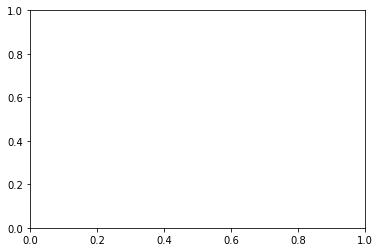

In [41]:
reqs.plot.bar(title='Frequency of entry requirements')

In [42]:
pd.DataFrame()

TypeError: 'dict' object is not callable

# <u> Degrees awarded </u>
### Again, it appears that diplomas are far more likely to be awarded.

In [43]:
degs = df2['degree'].value_counts()
degspct = df2['degree'].value_counts(normalize=True)
pd.DataFrame=({'count': degs, 'pct': degspct})